Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
GROUP_NR = "Group 47"
NAMES = "Savinjith Walisadeera, Adam Herbertsson, Tobias Riedel"
TOPIC = ""
DATE = "3/3-2023"

---

# Eigenvalues and Eigenvectors

- Problems 1 to 3 make you manipulate, implement and reflect upon some methods used to find eigenvalues and eigenvectors
- Problem 4 is an example of what can be done thanks to eigenvalue/eigenvector findings. The application is called Singular Spectrum Analysis (SSA) and helps to analyze time series. The problem looks quite long but you don't have much to code to add in fact. You may find this method useful when you will have to analyze data. 

In a few places, your are asked to answer questions that do not need coding. Write your answer as comment in the corresponding cell. Do not skip these questions.

## Problem 1
The normalized direct power method is an iterative method that allows to find the _largest_ eigenvalue of a matrix, and its corresponding eigenvector. We described it during the lecture and implemented it using the following algorithm:

$$
\pmb{z}^{(k)} = \pmb{Aq}^{(k-1)} \\
\pmb{q}^{(k)} = \frac{\pmb{z}^{(k)}}{\|\pmb{z}^{(k)}\|} \\
\mu(\pmb{q}^{(k)}) = [\pmb{q}^{(k)}]^T\pmb{Aq}^{(k)}
$$

Note: Remember that $^{(k)}$ means the $k^{th}$ iteration. The value $\mu(\pmb{q}^{(k)})$ tends toward the largest eigenvalue as $k$ increases.

### 1.1
Here you should implement the same method but, instead on iterating $k$ until reaching some preset, and potentially large, maximum number of iterations, the iterative process should stop automatically when a convergence criterion is reached. That convergence criterion is given by:

$$
\sum_{j=0}^{n-1} \Bigg| \frac{q_j^{(k)} - q_j^{(k-1)}}{q_j^{(k)}} \Bigg| \leq \epsilon 
$$

It means that the iteration should stop once the relative difference between $\pmb{q}$ at two successive iterations is negligible ($\epsilon$ conventionally refers to a value close to $0$).

- The function should print the total number of iterations needed to reach the criterion and return the eigenvalue and its corresponding eigenvector. Verification: with $\epsilon = 10^{-8}$ and the matrix `A = testcreate(4, 21)`, the criterion is met in $4$ iterations.
- If the solution fails to converge, your function should print that the convergence failed and return `None` as eigenvalue and eigenvector.  

### 1.2
Compare your result with `numpy.linalg.eig`. That function returns all eigenvalues and eigenvectors but you only need the largest eigenvalue and its eigenvector.  

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from SEE125_eig_lib import testcreate, power, qrdec

In [3]:
# 1.1 write the normalized direct power method with criterion stop
# You may start from the function power given in the book (code 4.6 p 180), which is reproduced below:
#
# def power(A,kmax=6):
#    zs = np.ones(A.shape[0])
#    qs = zs/mag(zs)
#    for k in range(1,kmax):
#        zs = A@qs
#        qs = zs/mag(zs)
#        print(k,qs)
#    lam = qs@A@qs 
#    return lam, qs # lam=eigenvalue, qs=eigenvector
# 
# Instead of just iterating on until kmax, use the criterion to stop the iteration. You can iterate using 
# a while loop or a for/else loop, as you prefer. In addition, since you need to compare q^(k) 
# with q^(k-1), make sure to store q^(k-1) before the next iteration (k).

def powercrit(A, ceps=1e-8, kmax=50): 
# inputs: Matrix A, epsilon (default value = 1e-8), maximum number of iteration (default=50)
    zs = np.ones(A.shape[0])
    qs = zs/np.linalg.norm(zs)
    # Write your modified power function with the criterion
    # YOUR CODE HERE
    zs = A@qs
    qs = zs/np.linalg.norm(zs)
    qso = qs

    for k in range(1, kmax):
      zs = A@qs
      qs = zs/np.linalg.norm(zs)

      # Stop cirterion
      s = 0
      for j in range(4):
        s += abs((qs[j] - qso[j])/qs[j])
      if s < ceps:
        print('Break at', k)
        break

      qso = qs

      print(k,qs)

    lam = qs@A@qs
    return lam, qs

# The matrix to work on, please keep these parameters
A = testcreate(4, 21)
# Run powercrit on A
eigenval, eigenvec = powercrit(A)

# 1.2
print('Powercrit vs numpy.linalg.eig results:')
# You have several options to do that, do as you like
# YOUR CODE HERE
print('val:', eigenval)
print('vec:', eigenvec)
print(np.linalg.eig(A))

1 [0.4443962  0.4821814  0.5172089  0.55000734]
2 [0.44439562 0.48218122 0.51720907 0.55000781]
Break at 3
Powercrit vs numpy.linalg.eig results:
val: 21.316662663461866
vec: [0.44439562 0.48218122 0.51720906 0.55000781]
(array([ 2.13166627e+01, -6.72337148e-02, -6.93022639e-05, -7.50128335e-08]), array([[ 0.44439562, -0.71207238, -0.51532474,  0.20536846],
       [ 0.48218122, -0.1981024 ,  0.59247232, -0.65201842],
       [ 0.51720906,  0.24202361,  0.39774447,  0.68859348],
       [ 0.55000781,  0.62859601, -0.47456959, -0.24193965]]))


### 1.3 
Let's run your function `powercrit` on  the matrix $\pmb{A} = -\pmb{A}$. If your solution converges, well done, you've already anticipated the issue. If not, update your function to print $\pmb{q}^{(k-1)}$, $\pmb{q}^{(k)}$ and $\mu(\pmb{q}^{(k)})$ at each iteration (and any other parameter that you think could help). Observe that $\mu(\pmb{q}^{(k)})$ does converge but that $\pmb{q}^{(k-1)}$ and $\pmb{q}^{(k)}$ are the opposite of each other at each iteration. What is the consequence for your criterion?

Knowing that having an eigenvector or its opposite has no importance (they are both valid for the same eigenvalue), edit your code to ensure that the solution will converge. Here you should test if $\pmb{q}^{(k-1)}$ and $\pmb{q}^{(k)}$ are opposite to each other and, if yes, do something.

In [4]:
A = testcreate(4, 21)
print('Original powercrit results:')
eigenval, eigenvec = powercrit(-A, 1e-8, 10)

# 1.3 If your solution does not converge, copy your function powercrit here and 
# rename it to avoid confusion (e.g. powercritsign). Then follow the edits 
# suggested in 1.3's 
# YOUR CODE HERE
def powercritsign(A, ceps=1e-8, kmax=50): 
# inputs: Matrix A, epsilon (default value = 1e-8), maximum number of iteration (default=50)
    zs = np.ones(A.shape[0])
    qs = zs/np.linalg.norm(zs)
    # Write your modified power function with the criterion
    # YOUR CODE HERE


    zs = A@qs
    qs = zs/np.linalg.norm(zs)
    qso = qs

    for k in range(1, kmax):
      zs = A@qs
      qs = zs/np.linalg.norm(zs)

      # Checking if vector is flipped
      if (qs@qso).sum() < 0:
        qs *= -1

      # Stop cirterion
      s = 0
      for j in range(4):
        s += abs((qs[j] - qso[j])/qs[j])
      if s < ceps:
        break

      qso = qs

      print(k,qs)

    lam = qs@A@qs
    return lam, qs


# Observe that mu(q^(k))$ does converge but that q^(k-1) and q^(k) are the opposite of 
# each other at each iteration. What is the consequence for your criterion? (Just write a quick
# sentence, no code asked here)
#
# The matrix A might flip the vector which makes it impossible to converge
#
print('Modified powercrit results:')
eigenval, eigenvec = powercritsign(-A, 1e-8, 10)

Original powercrit results:
1 [0.4443962  0.4821814  0.5172089  0.55000734]
2 [-0.44439562 -0.48218122 -0.51720907 -0.55000781]
3 [0.44439562 0.48218122 0.51720906 0.55000781]
4 [-0.44439562 -0.48218122 -0.51720906 -0.55000781]
5 [0.44439562 0.48218122 0.51720906 0.55000781]
6 [-0.44439562 -0.48218122 -0.51720906 -0.55000781]
7 [0.44439562 0.48218122 0.51720906 0.55000781]
8 [-0.44439562 -0.48218122 -0.51720906 -0.55000781]
9 [0.44439562 0.48218122 0.51720906 0.55000781]
Modified powercrit results:
1 [-0.4443962  -0.4821814  -0.5172089  -0.55000734]
2 [-0.44439562 -0.48218122 -0.51720907 -0.55000781]


# Problem 2

The power method returns the largest eigenvalue and its eigenvector. The inverse power method returns the smallest eigenvalue and its eigenvector. The inverse power method with shifting returns all eigenvalues and eigenvectors, provided one can feed it with a "close guess" of the actual eigenvalue.

The method is implemented in the function `invpowershift`, which is already written in the library `SEE125_eig_lib`. You can also review it in the book (code 4.7 page 185). So no need to rewrite it but make sure you understand it.

Use `invpowershift` to find the eigenvalues and eigenvector of the matrix
$$
\pmb{M}=\begin{pmatrix}
3 & 1 & 2 \\
1 & 4 & 3 \\
2 & 3 & 1 \\
\end{pmatrix}
$$

You can test the shifts as you like but eventually, print clearly the eigenvalues and eigenvectors of the matrix

In [5]:
from SEE125_eig_lib import invpowershift

M = np.array([3,1,2,1,4,3,2,3,1.]).reshape(3,3)

# 
# YOUR CODE HERE
s1 = 2.3
s2 = -1.2

print('invpowershit: Highest eigenvalue', invpowershift(M))
print('invpowershit: Middle eigenvalue', invpowershift(M,s1))
print('invpowershit: Lowest eigenvalue', invpowershift(M,s2))

invpowershit: Highest eigenvalue (6.841983660213278, array([0.45976768, 0.71612371, 0.52514808]))
invpowershit: Middle eigenvalue (2.384106321209236, array([ 0.83557875, -0.54910022,  0.01723628]))
invpowershit: Lowest eigenvalue (-1.2260899814225155, array([-0.30070223, -0.4308779 ,  0.8508363 ]))


# Problem 3

In this problem you will implement the _simultaneous iteration_ method, which is a generalization of the power method to more than one eigenvector and is central to the QR method. This problem will guide you through its implementation, recalling only the essential steps that must be coded (the detailed derivations are in the book pp. 194-199, but you do not need them to complete this problem). There is quite some text but the codes you are asked to write are short.

## 3.1
Implement the equation $\pmb{Z}^{(k)} = \pmb{AZ}^{(k-1)}$ where $\pmb{A}$ is the matrix from which you want to extract the eigenvectors and $\pmb{Z}$ is the eigenvectors matrix (really the same principle as for the power method, but for all eigenvectors, one per column in $\pmb{Z}$). Since this is an iterative method, you will start with an initial guess for $\pmb{Z}^{(0)}$. Simply use the identity matrix having the same dimension as $\pmb{A}$. Print the $\pmb{Z}$ after the last iteration and notice the amplitude of the vectors in $\pmb{Z}$.

In [6]:
# Our usual 4x4 matrix 
A = testcreate(4,21)
# 3.1
# Use np.identity for your initial guess, iterate Z^(k) = AZ^(k-1) (~10 times) and 
# print Z after the last iteration.
# YOUR CODE HERE

n = np.shape(A)[0]
Z = np.identity(n)

for k in range(10):
    Z = A@Z
  
print(Z)

[[4.19595578e+12 4.27375590e+12 4.35012814e+12 4.42515019e+12]
 [4.55272511e+12 4.63714034e+12 4.72000627e+12 4.80140722e+12]
 [4.88345583e+12 4.97400336e+12 5.06288906e+12 5.15020334e+12]
 [5.19313952e+12 5.28942912e+12 5.38395149e+12 5.47680280e+12]]


## 3.2
Same as in 3.1 but now normalize each column of $\pmb{Z}$ at each iteration. _Normalize_ means to divide each column by its norm. You can use `np.linalg.norm`. The reason for this normalization is too avoid diverging to enormous values, as in 3.1.

In [7]:
A = testcreate(4,21)
# 3.2
# Same as 3.1 plus a normalization of at each iteration. Since you normalize each column in Z, you 
# should loop on the column index. The i_th column of Z is accessed by Z[:,i].
# YOUR CODE HERE
n = np.shape(A)[0]
Z = np.identity(n)

for k in range(10):
    Z = A@Z
    # Normalizing
    for i in range(n):
      Z[:,i] /= np.linalg.norm(Z[:,i])

print(Z)

[[0.44439562 0.44439562 0.44439562 0.44439562]
 [0.48218122 0.48218122 0.48218122 0.48218122]
 [0.51720906 0.51720906 0.51720906 0.51720906]
 [0.55000781 0.55000781 0.55000781 0.55000781]]


Notice how $\pmb{Z}$ seem to converge now. However, look carefully at each eigenvector, what do you see? Compare your result with the eigenvector obtained with the function `power` (that function is already available in your library, and loaded, just run it on $\pmb{A}$).

In [8]:
# Look carefully at each eigenvector, what do you see? 
# (Just write a quick sentence, no code asked here)
# Print the eigenvector returned by the function power(A)
# YOUR CODE HERE
print('Method with normalization')
print(Z)
print('Power method:')
pwr = power(A)
print(pwr)



Method with normalization
[[0.44439562 0.44439562 0.44439562 0.44439562]
 [0.48218122 0.48218122 0.48218122 0.48218122]
 [0.51720906 0.51720906 0.51720906 0.51720906]
 [0.55000781 0.55000781 0.55000781 0.55000781]]
Power method:
(21.316662663452, array([0.44439562, 0.48218122, 0.51720906, 0.55000781]))


## 3.3
As you just noticed, the normalization in 3.2 does not really help (no improvement compared to the simple power method). Thus you will now implement the actual simultaneous iteration. Instead of normalizing the eigenvector at each iteration (as in 3.2), one should orthonormalize them (the vectors are both normalized and orthogonal to each other). This consist in two steps:
$$
1.\quad \pmb{Z}^{(k)} = \pmb{AQ}^{(k-1)}\\
2.\quad \pmb{Z}^{(k)} = \pmb{Q}^{(k)}\pmb{R}^{(k)}
$$
The first step is very similar to 3.1 and you shall again use the identity matrix as an initial guess for $\pmb{Q}^{(0)}$. 

The second step is called a QR-decomposition (detailed in the lecture), which decompose a matrix into an orthonormal matrix  $\pmb{Q}$ and an upper-triangular matrix $\pmb{R}$ (that we won't use here). To do this step, just use the function `qrdec`, also loaded and ready to use as `Q, R = qrdec(Z)`.

In [9]:
A = testcreate(4,21)
# 3.3
# First compute Z(1) with the step 1 and Q(0) set to the identity matrix, then use qrdec on Z(1) to 
# get Q(1). Repeat the two steps to get Z(2) and Q(2), and so on, for eg 20 iterations. 
# Finally, print the Q after the last iteration
# YOUR CODE HERE
n = np.shape(A)[0]
Q = np.identity(n)

Z = A@Q
for k in range(20):
    Q, R = qrdec(Z)
    Z = A@Q

print(Q)

[[ 0.44439562 -0.73955388  0.48132664 -0.15458738]
 [ 0.48218122 -0.22691983 -0.60327942  0.59334863]
 [ 0.51720906  0.21190446 -0.38740152 -0.73315166]
 [ 0.55000781  0.59721348  0.50428036  0.29415776]]


# 3.4 
Just some information (no needed for this last code): The matrix $\pmb{Q}$ you just obtained is related to the eigenvectors of $\pmb{A}$.
Let's call $\pmb{V}$ the eigenvector matrix of $\pmb{A}$. 
As the number of iterations increases, $\pmb{Q}$ converges toward the Q-matrix of the QR-decomposition of $\pmb{V}$ (say toward $\pmb{Q_A}$ with the QR decomposition $\pmb{V} = \pmb{Q_A}\pmb{R_A}$). 

To finish, one can compute the eigenvalues of $\pmb{A}$ using $\pmb{A}^{(k)} = [\pmb{Q}^{(k)}]^T\pmb{AQ}^{(k)}$. The eigenvalues are the diagonal elements of $\pmb{A}^{(k)}$. Since you have already computed $\pmb{Q}^{(k)}$ in 3.3, just use it to compute $\pmb{A}^{(k)}$ and print it's diagonal elements. This will return the eigenvalues of $\pmb{A}$, the same as those obtained from `np.linalg.eig`.

In [10]:
# QR decomposition of the eigenvector matrix of A.
e, V = np.linalg.eig(A)
QA, RA = qrdec(V)
print(QA@RA-V) # all zeros

# 3.4
print('Eigenvalues of A')
# Compute Ak = Q_transpose*A*Q and print the diagonal elements of Ak using np.diag(Ak)
# YOUR CODE HERE
Ak = Q.transpose()@A@Q
print(Ak.diagonal())
print(e) # computed with numpy, for ref

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11022302e-16  1.11022302e-16]
 [ 0.00000000e+00  2.77555756e-17  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11022302e-16  0.00000000e+00]]
Eigenvalues of A
[ 2.13166627e+01 -6.72337148e-02 -6.93022639e-05 -7.50129117e-08]
[ 2.13166627e+01 -6.72337148e-02 -6.93022639e-05 -7.50128335e-08]


# Problem 4

This problem introduces the singular spectrum analysis (SSA) method. When working on a time series, SSA helps to extract temporal patterns that can be grouped into trend, oscillations and noise. Such patterns usually help to understand what is going on, the physical processes involved and even to do some prediction.

In this problem, most of the SSA and its engine, the singular value decomposition (SVD), are already coded using these two resources for __[SSA](https://www.kaggle.com/jdarcy/introducing-ssa-for-time-series-decomposition)__ and __[SVD](https://web.mit.edu/be.400/www/SVD/Singular_Value_Decomposition.htm)__. The idea is more to show an example of application of computing eigenvalues and eigenvectors and, importantly, that you get to know about SSA for your own usage.

The SSA is applied here to a time series of vertical coordinates recorded by a permanent GNSS station located in Mårstbo, Sweden. The data show to the upward displacement of the ground at that location.

_For your information_: GNSS means Global Navigation Satellite System. The GPS is an example of GNSS. When you walk around with your GPS, you see your coordinates changing. Interestingly, if you stick a GPS on the ground, its coordinates are still changing. That is because the surface of the earth is moving (think about the continental drift for instance), horizontally and vertically, although with very low amplitudes (mm to cm). That is why geophysicists and civil engineers like to install GPS (or GNSS, to be more generic) stations everywhere, they measure the displacements of the earth's surface, in three dimensions (eastward, northward and upward). These stations and the processing of their data are more sophisticated than what is done with a regular smartphone, but the basic concept is exactly the same.

We will first load the data recorded in Mårstbo (station name MAR6) and plot them. Then you will be guided through the SSA method.

In [11]:
# Nothing to do, just read/run the cell
import pandas as pd

def X_to_TS(X_i):
    """Averages the anti-diagonals of the given elementary matrix, X_i, and returns a time series."""
    # Reverse the column ordering of X_i
    X_rev = X_i[::-1]
    # Full credit to Mark Tolonen at https://stackoverflow.com/a/6313414 for this one:
    return -np.array([X_rev.diagonal(i).mean() for i in range(-X_i.shape[0]+1, X_i.shape[1])])

Let's load the data. Here we use `pandas`, which you encountered before and which is very useful for data analysis.

In [12]:
# Nothing to do, just read/run the cell
# Load the data recorded at Mårstbo
gnss_data = 'MAR6.series'
gnss = pd.read_csv(gnss_data, delim_whitespace=True, header=None, parse_dates=[[11, 12, 13]])
# Remove data we don't need
gnss = gnss.drop(columns=[0])
for i in range(4, 11):
    gnss = gnss.drop(columns=[i])
gnss = gnss.drop(columns=[14, 15, 16])
# Rename the columns explicitely
# date, Est, Norh, Up components in meters
gnss.columns = ['date', 'E', 'N', 'U']
gnss = gnss.set_index('date')
gnss = gnss.sort_index()
# resample the series, one value per month instead of one per day
gnss_m = gnss.resample('m').mean()
# interpolate missing values
gnss_m = gnss_m.interpolate('linear')
# clip the time series
gnss_m = gnss_m.loc['2000-01-01':'2019-12-31']
gnss_m

,E,N,U
date,,,
2000-01-31,-0.407941,-0.324698,-0.179728
2000-02-29,-0.406532,-0.322688,-0.181280
2000-03-31,-0.403547,-0.323327,-0.179976
2000-04-30,-0.403568,-0.321581,-0.173550
2000-05-31,-0.403709,-0.321397,-0.172581
...,...,...,...
2019-08-31,-0.060954,-0.047213,-0.031935
2019-09-30,-0.059427,-0.046128,-0.036732
2019-10-31,-0.057983,-0.045268,-0.035712


## 4.1
Now plot the upward displacement of the resampled GNSS data on top the upward displacement of the original data. The dataframe of the resampled and clipped GNSS data is `gnss_m` and the upward displacement is labeled `U` (unit is meters).

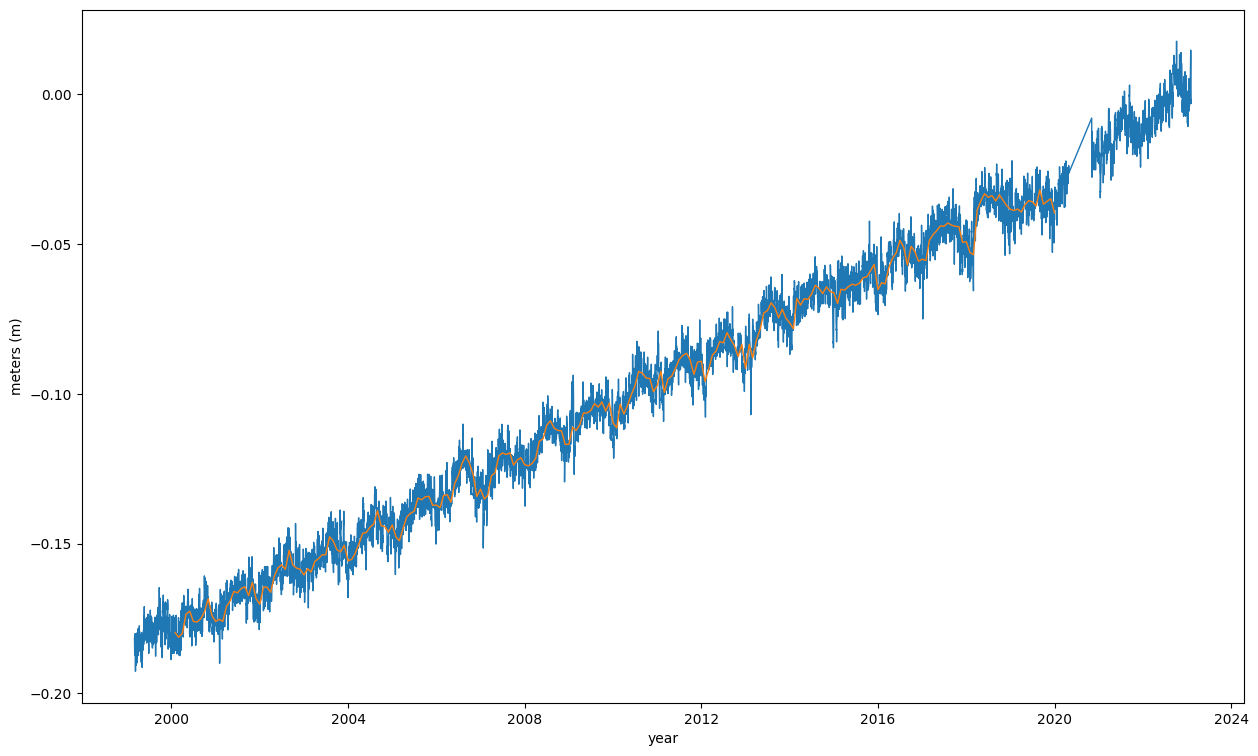

In [14]:
# Visualisation
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))
ax1.plot(gnss['U'], label='Original data', lw=1)
# 4.1 Plot the upward displacement of the resampled and clipped GNSS data, and label the plot properly.
# YOUR CODE HERE
plt.plot(gnss_m['U'], label='resampled and clipped', lw = 1)
plt.xlabel('year')
plt.ylabel('meters (m)')
plt.show()

The next cell creates a matrix out of the time series you just plotted. How? First we define a window length $L$ (shorter than the length $n$ of the time series) and sequentially cut the time series into smaller series of length $L$. Then these $L$-long series are concatenated together in columns to from the matrix $\pmb{X}$. The sketch below represents the idea:

Let's say $D$ is the GNSS time series and $d_i$ is the upward displacement value at time $i$, we write:

$D = [d_0 \; d_1 \;d_2\; \cdots \;d_{n-1}]$

Sequential cuts of lengths $L$ returns:

$
D_0 = [d_0 \; d_1 \;d_2\; \dots \;d_{L-1}]\\
D_1 = [d_1 \; d_2 \;d_3\; \dots \;d_{L}]\\
D_2 = [d_2 \; d_3 \;d_4\; \dots \;d_{L+1}]\\
\cdots \\
D_{n-L} = [d_{n-L} \; d_{n-L+1} \;d_{n-L+2}\; \dots \;d_{n-1}]\\
$

Then concatenate the transposes of $D_i$ as columns:

$
X=[D_0^T \; D_1^T \; D_2^T \; \cdots \; D_{n-L}^T]
=\begin{pmatrix}
d_0 & d_1 & d_2 & \dots & d_{n-L}\\
d_1 & d_2 & d_3 & \dots & d_{n-L+1}\\
d_2 & d_3 & d_4 & \dots & d_{n-L+2}\\
\cdots \\
d_{L-1} & d_{L} & d_{L+1} & \dots & d_{n-1}\\
\end{pmatrix}
$

$\pmb{X}$ is called the trajectory matrix. An anti-diagonality feature automatically appears when constructing $\pmb{X}$ (track any $d_i$ elements in $\pmb{X}$) and is quite clear in the graphic representation of $\pmb{X}$, as shown below.

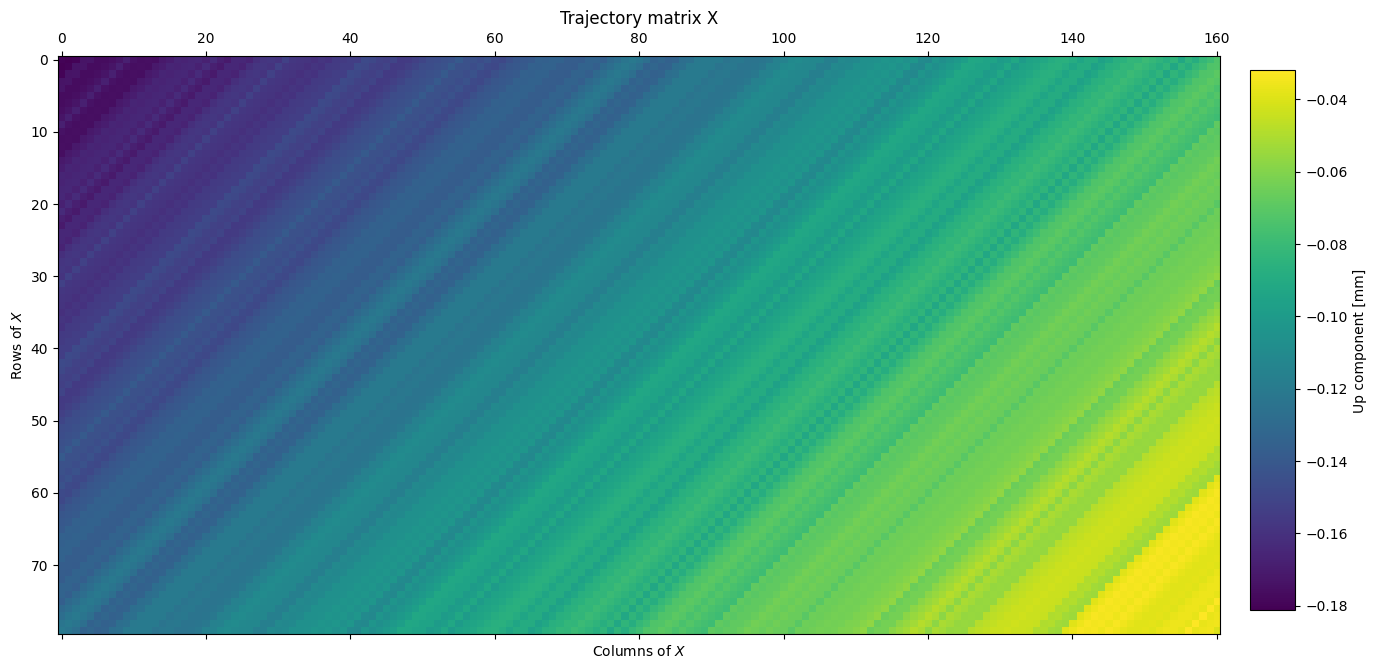

In [15]:
# Nothing to do, just run the cell
gnssa = np.array(gnss_m['U']) # convert gnss_m['U'] to an array
L = 80 # The window length.
K = gnssa.shape[0] - L + 1 # The number of columns in the trajectory matrix.
# Create the trajectory matrix by pulling the relevant subseries of F, and stacking them as columns.
X = np.column_stack([gnssa[i:i+L] for i in range(0, K)])
# Note: the i+L above gives us up to i+L-1, as numpy array upper bounds are exclusive.
d = np.linalg.matrix_rank(X) # The intrinsic dimensionality of the trajectory space.

fig2, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))
im = ax1.matshow(X)
ax1.set_xlabel("Columns of $X$") # each column is a L-length vector
ax1.set_ylabel("Rows of $X$")
ax1.set_title("Trajectory matrix X")
cax = plt.axes([0.92, 0.2, 0.03, 0.6])
cbar = fig2.colorbar(im, cax)
cbar.set_label('Up component [mm]')
plt.show()

## 4.2

Now the most important part: to do the singular value decomposition (SVD) of $\pmb{X}$. 
Having SVD-decomposed $\pmb{X}$ means that one can write:
$$
\pmb{X} = \sum_{i=0}^{d-1} \sigma_i U_i V_i^T = \sum_{i=0}^{d-1} \pmb{X}_i
$$

Simply put, $\pmb{X}$ is decomposed into several elementary matrices $\pmb{X}_i$, each of which representing some particular feature of $\pmb{X}$. Then, since $\pmb{X}$ was constructed from the orginal time series of your data, each elementary matrix $\pmb{X}_i$ can be converted back to time series of such features.

In details, to do an SVD on $\pmb{X}$ consists in finding the eigenvalues and eigenvectors of $\pmb{XX}^T$ and $\pmb{X}^T\pmb{X}$. The eigenvectors of $\pmb{XX}^T$ make up the columns of $\pmb{U}$, the eigenvectors of $\pmb{X}^T\pmb{X}$ make up the columns of $\pmb{V}$. The singular values stored in the Sigma matrix $\pmb{S}$ are square roots of eigenvalues from $\pmb{XX}^T$ or $\pmb{X}^T\pmb{X}$. The singular values $\sigma_i$ are the diagonal entries of $\pmb{S}$ and are arranged in descending order. The singular values are always real numbers. If the matrix $\pmb{X}$ is a real matrix, then $\pmb{U}$ and $\pmb{V}$ are also real. In the equation above, $U_i V_i^T$ is the outer product of $V_i^T$ and $V_i^T$.

Here you must implement the first step: compute the eigenvalues and eigenvectors of $\pmb{XX}^T$ and $\pmb{X}^T\pmb{X}$. Use the numpy function `np.linalg.eigh`. The remaining steps are already coded. 

In [16]:
# Let's define W1 = XXT and W2 = XTX
W1 = X@X.T
W2 = X.T@X

# 4.2: Use np.linalg.eigh to compute the eigenvalues and eigenvectors of W1 and W2. 
# name them eigvalW1, eigvecW1, eigvalW2 and eigvecW2
# YOUR CODE HERE
eigvalW1 = np.linalg.eigh(W1)[0]
eigvalW2 = np.linalg.eigh(W2)[0]
eigvecW1 = np.linalg.eigh(W1)[1]
eigvecW2 = np.linalg.eigh(W2)[1]
# sort decreasing eigval W1
s1 = np.argsort(-eigvalW1) # negate to get descending order
U = np.empty(shape=np.shape(eigvecW1))
for i, id in enumerate(s1):
    U[:, i] = eigvecW1[:, id]

# sort decreasing eigval W2
s2 = np.argsort(-eigvalW2)  # negate to get descending order
V = np.empty(shape=np.shape(eigvecW2))
for i, id in enumerate(s2):
    V[:, i] = np.real(eigvecW2[:, id])

# The singular values in S are square roots of eigenvalues from XXT or XTX
Sigma = np.sqrt(-np.sort(-eigvalW1))

(Note that the SVD decomposition implemented in the cell above is in fact directly available with `np.linalg.svd`. You would write: `U, Sigma, V = np.linalg.svd(X)`. The reason for not simply using `np.linalg.svd` is only to emphasize where the eigenvalues and eigenvectors are used.)

Finally one can compute $\pmb{X}_i$:

In [17]:
# Nothing to do, just run the cell
# Calculate the elementary matrices of X, storing them in a multidimensional NumPy array.
# This requires calculating sigma_i * U_i * (V_i)^T for each i, or sigma_i * outer_product(U_i, V_i).
# Note that Sigma is a 1D array of singular values, instead of the full L x K diagonal matrix.
X_elem = np.array( [Sigma[i] * np.outer(U[:,i], V[:,i]) for i in range(0,d)] )

## 4.3

The last step is to convert the elementary matrices $\pmb{X}_i$ to time series using the function `X_to_TS`, which is already implemented. Here, we choose to visualize the first 3 components (feel can change that value).

The original GNSS upward displacement time series and its SSA decomposition are now store into the dataframe `gnss_m_SSA`. 
Make a figure that shows together the upward displacement time series and the first 3 components extracted by the SSA (or more, if you changed `n_compo`). Label the figure properly.

                   E         N         U  Component_01  Component_02  \
date                                                                   
2000-01-31 -0.407941 -0.324698 -0.179728     -0.188135     -0.009711   
2000-02-29 -0.406532 -0.322688 -0.181280     -0.187275     -0.009400   
2000-03-31 -0.403547 -0.323327 -0.179976     -0.186407     -0.009160   
2000-04-30 -0.403568 -0.321581 -0.173550     -0.185568     -0.009007   
2000-05-31 -0.403709 -0.321397 -0.172581     -0.184778     -0.008819   
...              ...       ...       ...           ...           ...   
2019-08-31 -0.060954 -0.047213 -0.031935     -0.043629     -0.010245   
2019-09-30 -0.059427 -0.046128 -0.036732     -0.043240     -0.010206   
2019-10-31 -0.057983 -0.045268 -0.035712     -0.042853     -0.010145   
2019-11-30 -0.056813 -0.044208 -0.034903     -0.042493     -0.010113   
2019-12-31 -0.055220 -0.043393 -0.039664     -0.042166     -0.010021   

            Component_03  
date                      
2000-01-3

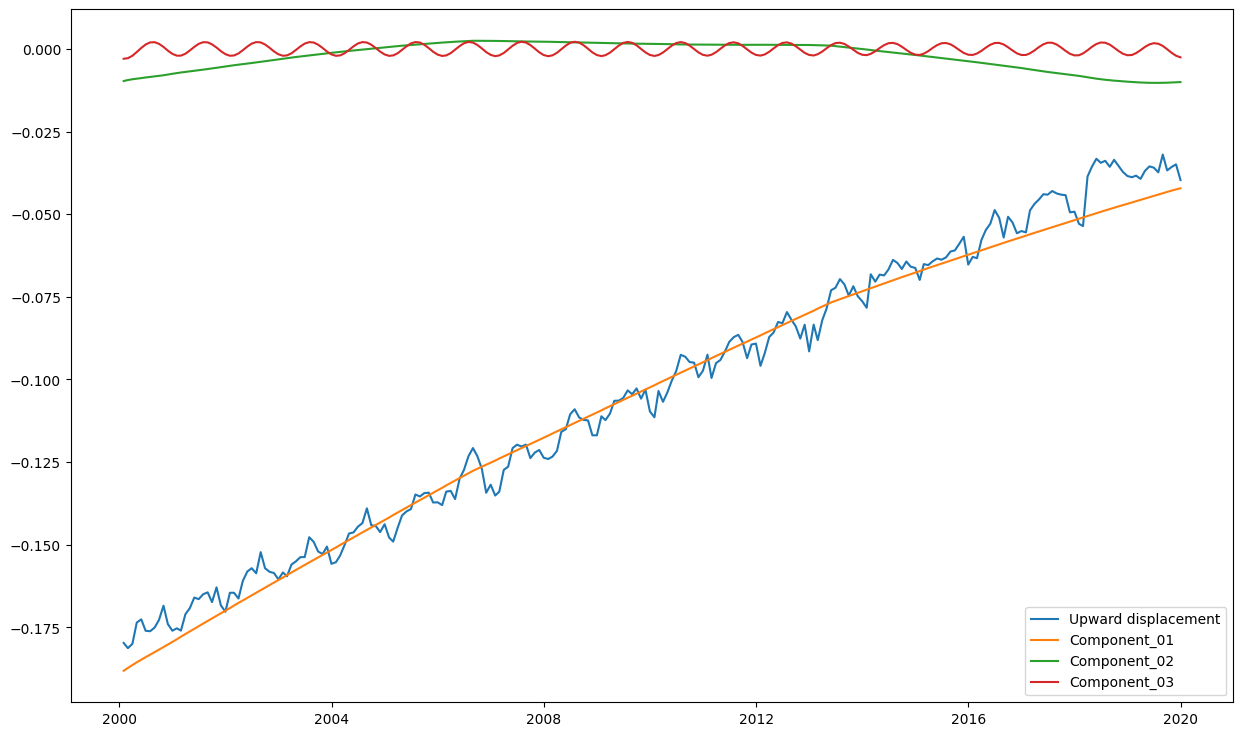

In [ ]:
# We decompose the time series into "n_compo" components (you can play with that parameter)
n_compo = 3

# just to store the components into a copy of the dataframe gnss_m:
gnss_m_SSA = gnss_m.copy()

# Convert elementary matrices Xi straight to time series and store the results in the dataframe gnss_m_SSA. Each component is 
# labelled 'Component_01', 'Component_02', 'Component_03', ...
for i in range(n_compo):
    F_i = X_to_TS(X_elem[i])
    gnss_m_SSA['Component_{:02d}'.format(i+1)] = F_i 

# Print the dataframe with the SSA components
print(gnss_m_SSA)

# Figure
fig3, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))
# Show the data and the patterns found in it by the SSA.
# YOUR CODE HERE
ax3.plot(gnss_m_SSA['U'], label='Upward displacement')

for n in range(n_compo):
    ax3.plot(gnss_m_SSA[f'Component_0{n+1}'], label=f'Component_0{n+1}')
    
ax3.set_xlabel('Years')
ax3.set_ylabel('Meters (m)')


See how the original time series has been split into different kinds of patterns by SSA.